In [23]:
pip install statsmodels - -upgrade


Usage:   
  /Library/Frameworks/Python.framework/Versions/3.12/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /Library/Frameworks/Python.framework/Versions/3.12/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /Library/Frameworks/Python.framework/Versions/3.12/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /Library/Frameworks/Python.framework/Versions/3.12/bin/python3 -m pip install [options] [-e] <local project path> ...
  /Library/Frameworks/Python.framework/Versions/3.12/bin/python3 -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [66]:
#Importing libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
import os

curr_wor_dir = os.getcwd()
data = '/data_ipynb/df_62080.csv'
final_data_dir = curr_wor_dir + data

In [67]:
#Reading the dataset, to start with we are working on Katy city time series dataset
df=pd.read_csv(final_data_dir,index_col=0)
X=df.values
print( 'Shape of data \t', df.shape)
print( 'Orignal Dataset: \n', df.head())
print( 'After Extracting only values: \n',X)

Shape of data 	 (298, 1)
Orignal Dataset: 
                      cost
date                     
2000-01-31  148936.874942
2000-02-29  150417.156149
2000-03-31  151529.024100
2000-04-30  153384.960796
2000-05-31  154715.991938
After Extracting only values: 
 [[148936.87494171]
 [150417.15614901]
 [151529.02409969]
 [153384.96079606]
 [154715.99193814]
 [156163.62890552]
 [157971.32884417]
 [159803.29466749]
 [161752.99138531]
 [164201.77006209]
 [166976.91439601]
 [169490.22874174]
 [171672.06060814]
 [173735.78138141]
 [176078.90690409]
 [178570.34060551]
 [180954.36598032]
 [183056.93219098]
 [185029.96073038]
 [186897.07746772]
 [188591.38254894]
 [189806.8614078 ]
 [191939.41482301]
 [194978.48967116]
 [198491.68077174]
 [201344.40852161]
 [203463.63898277]
 [205341.27055732]
 [206903.08975365]
 [208688.50728069]
 [210562.07252196]
 [212605.88632596]
 [214578.57390718]
 [216453.12888907]
 [218099.27140811]
 [219513.06514574]
 [220864.68324735]
 [222342.22741692]
 [223731.46797814]
 

<Axes: xlabel='date'>

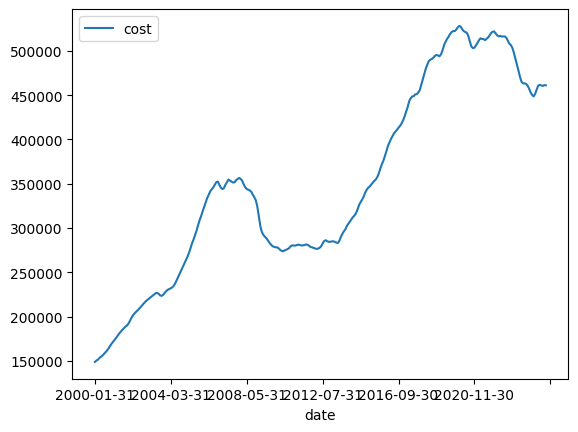

In [68]:
df.plot()

1. ADF :  -1.536181548880344
2. P-Value:  0.515543010122087
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796

The series is non-stationary. Proceeding with differencing...

Testing stationarity after differencing:
1. ADF :  -2.5592453564474136
2. P-Value:  0.10171631407198972
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796

The series is still non-stationary. Consider additional differencing or transformations.


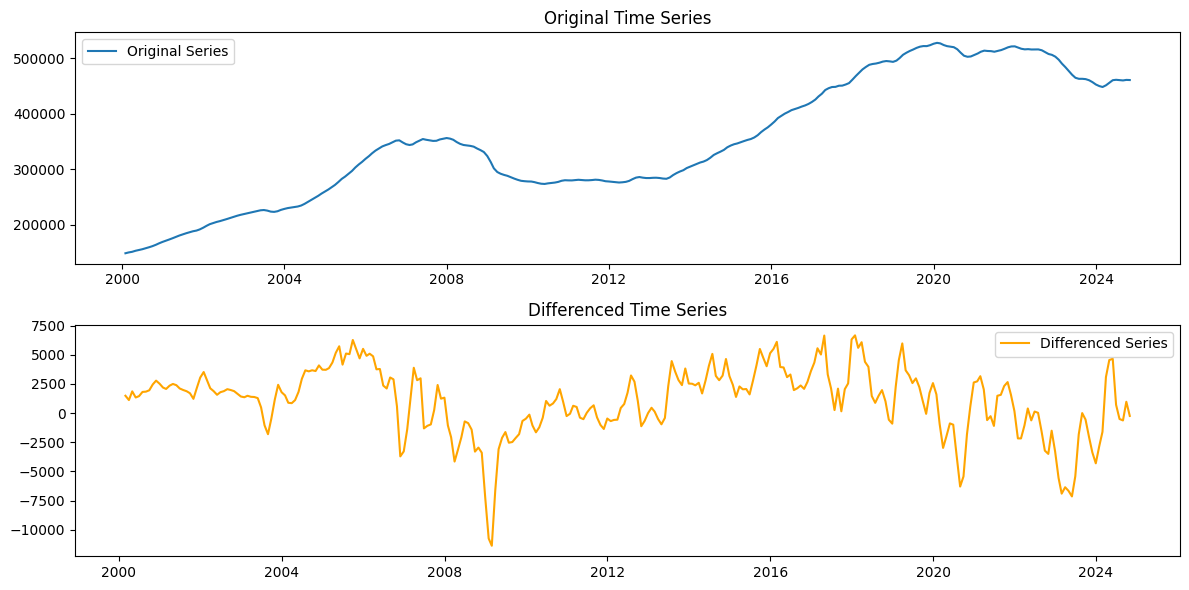

In [69]:
# We start with ARMA and ARIMA 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Loading the dataset
df = pd.read_csv(final_data_dir, parse_dates=["date"], index_col="date")

# Step 2: Checking if the series is stationary or not 
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value: ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
    return dftest[1]

p_value = test_stationarity(df["cost"])
if p_value > 0.05:
    print("\nThe series is non-stationary. Proceeding with differencing...")
else:
    print("\nThe series is stationary. No differencing required.")

# Step 3: Differencing the series if the series is not stationary 
differenced_series = df["cost"].diff().dropna()

# Step 4: Re-checking stationarity after differencing
print("\nTesting stationarity after differencing:")
p_value_diff = test_stationarity(differenced_series)
if p_value_diff > 0.05:
    print("\nThe series is still non-stationary. Consider additional differencing or transformations.")
else:
    print("\nThe series is now stationary and ready for ARIMA modeling.")

# Step 5: Ploting the original and differenced time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df["cost"], label="Original Series")
plt.title("Original Time Series")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(differenced_series, label="Differenced Series", color="orange")
plt.title("Differenced Time Series")
plt.legend()

plt.tight_layout()
plt.show()



Testing stationarity after second-order differencing:
1. ADF :  -6.68961036169977
2. P-Value:  4.1415253062523894e-09
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 284
5. Critical Values :
	 1% :  -3.4535872903895797
	 5% :  -2.871771355211212
	 10% :  -2.5722217283277127

The series is now stationary and ready for ARIMA modeling.


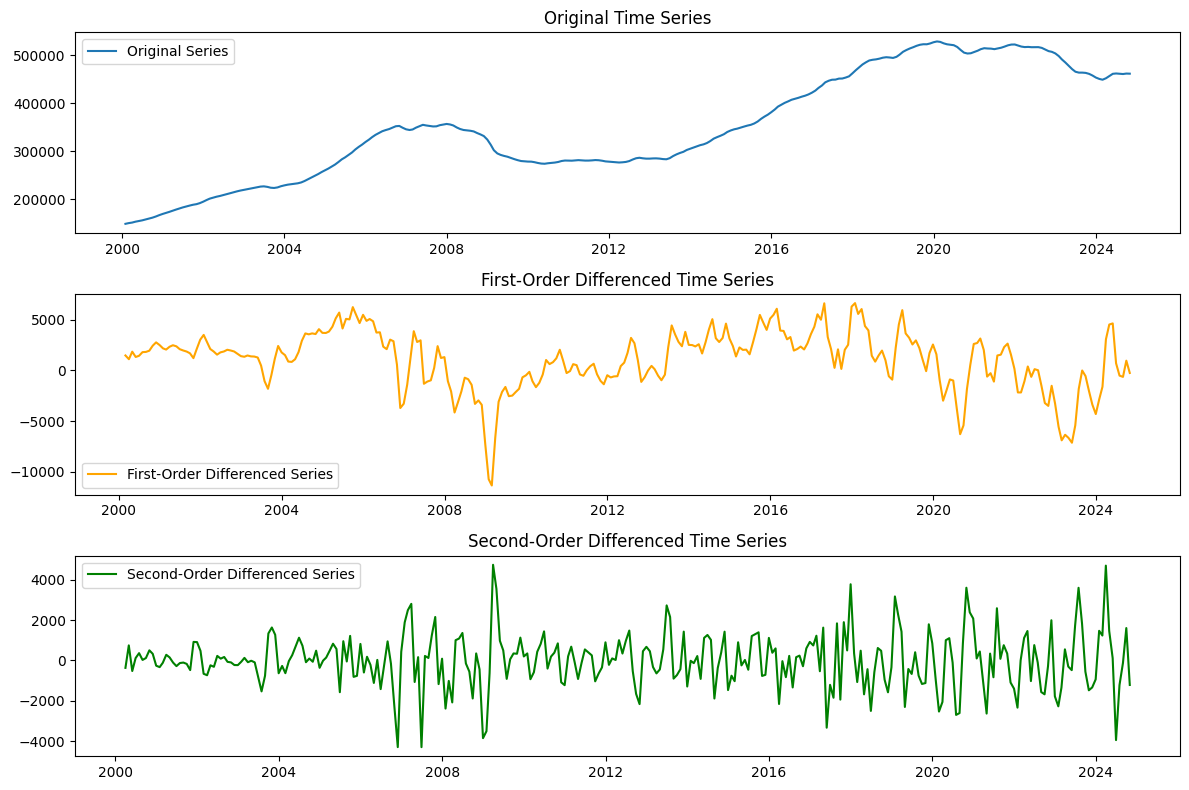


Testing stationarity after log transformation and differencing:
1. ADF :  -2.6185987233262873
2. P-Value:  0.08921389163964155
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796

The series is still non-stationary after log transformation.


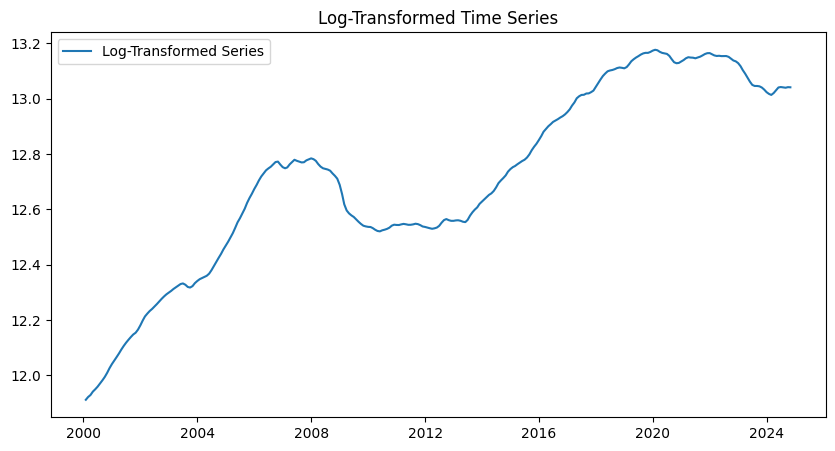

In [70]:
# Step 3.1: Apply second-order differencing
second_diff_series = differenced_series.diff().dropna()

# Step 4: Re-check stationarity after second-order differencing
print("\nTesting stationarity after second-order differencing:")
p_value_second_diff = test_stationarity(second_diff_series)
if p_value_second_diff > 0.05:
    print("\nThe series is still non-stationary. Consider additional transformations.")
else:
    print("\nThe series is now stationary and ready for ARIMA modeling.")

# Step 5: Plot original, first-order, and second-order differenced series
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df["cost"], label="Original Series")
plt.title("Original Time Series")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(differenced_series, label="First-Order Differenced Series", color="orange")
plt.title("First-Order Differenced Time Series")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(second_diff_series, label="Second-Order Differenced Series", color="green")
plt.title("Second-Order Differenced Time Series")
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Apply log transformation before differencing
df["log_value"] = np.log(df["cost"].replace(0, np.nan)).dropna()
log_diff_series = df["log_value"].diff().dropna()

print("\nTesting stationarity after log transformation and differencing:")
p_value_log_diff = test_stationarity(log_diff_series)
if p_value_log_diff > 0.05:
    print("\nThe series is still non-stationary after log transformation.")
else:
    print("\nThe series is now stationary after log transformation and differencing.")

# Plot log-transformed series
plt.figure(figsize=(10, 5))
plt.plot(df["log_value"], label="Log-Transformed Series")
plt.title("Log-Transformed Time Series")
plt.legend()
plt.show()


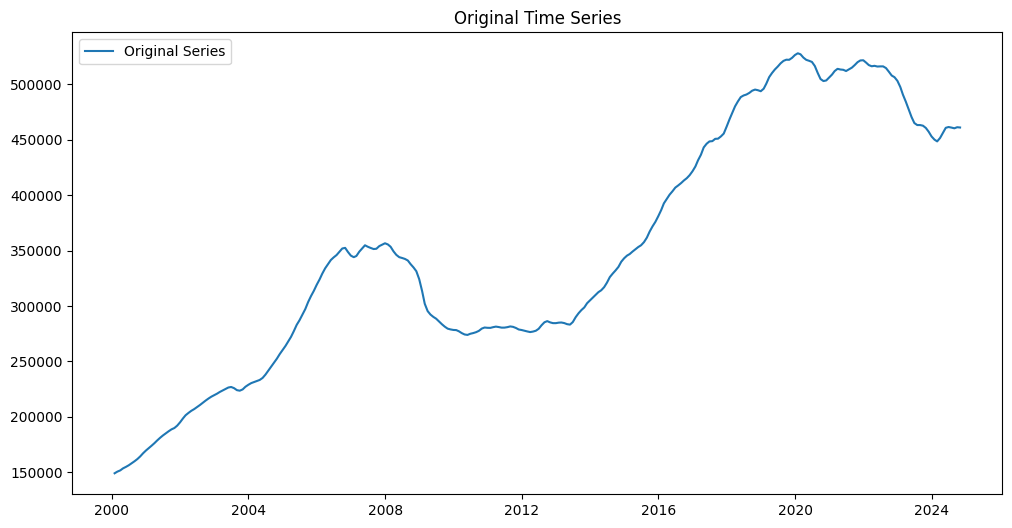


Performing Original Series
1. ADF :  -1.536181548880344
2. P-Value:  0.515543010122087
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796

The series is not stationary.


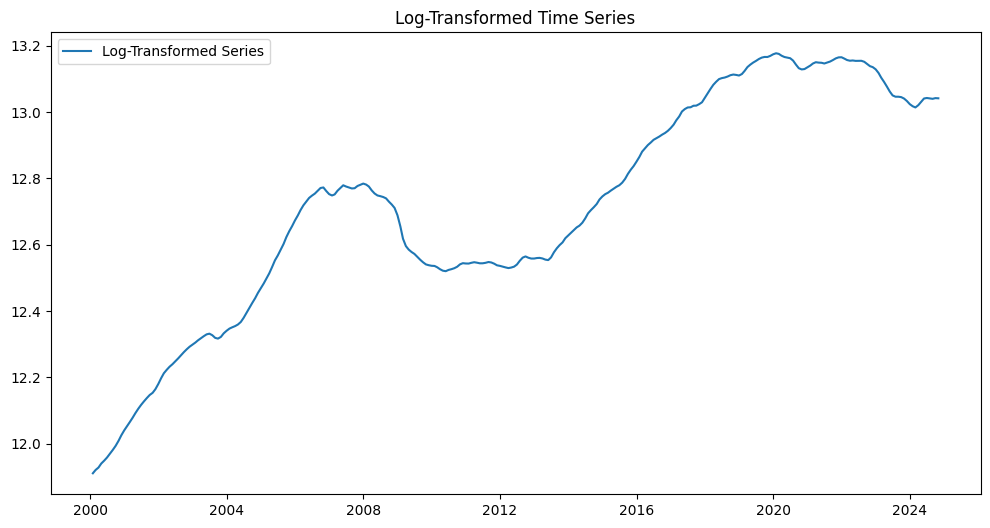


Performing Log-Transformed Series
1. ADF :  -1.7320396792254977
2. P-Value:  0.4146848344214194
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796

The series is not stationary.


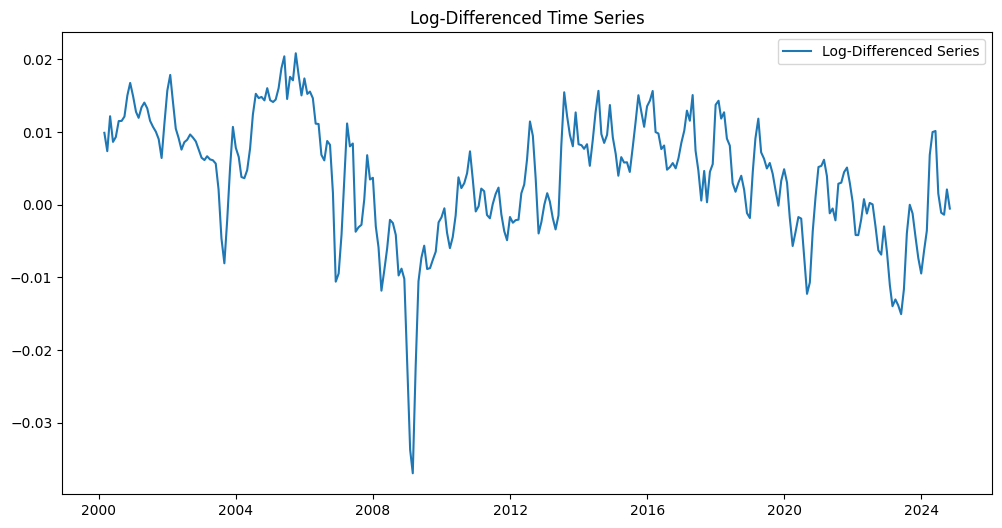


Performing Log-Differenced Series
1. ADF :  -2.6185987233262873
2. P-Value:  0.08921389163964155
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796

The series is not stationary.


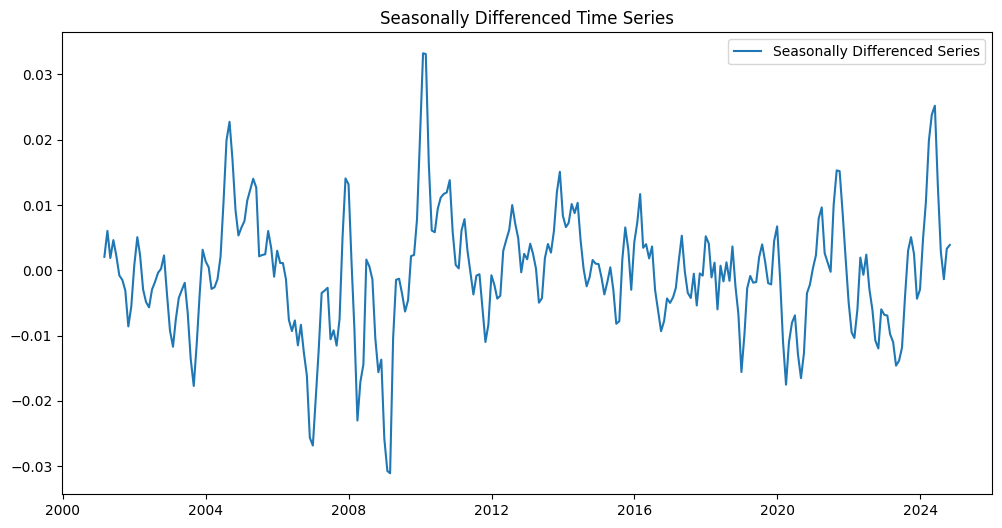


Performing Seasonally Differenced Series
1. ADF :  -3.912587748889868
2. P-Value:  0.001944136652925795
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 268
5. Critical Values :
	 1% :  -3.454988209954765
	 5% :  -2.8723857312734613
	 10% :  -2.572549407997327

The series is stationary.


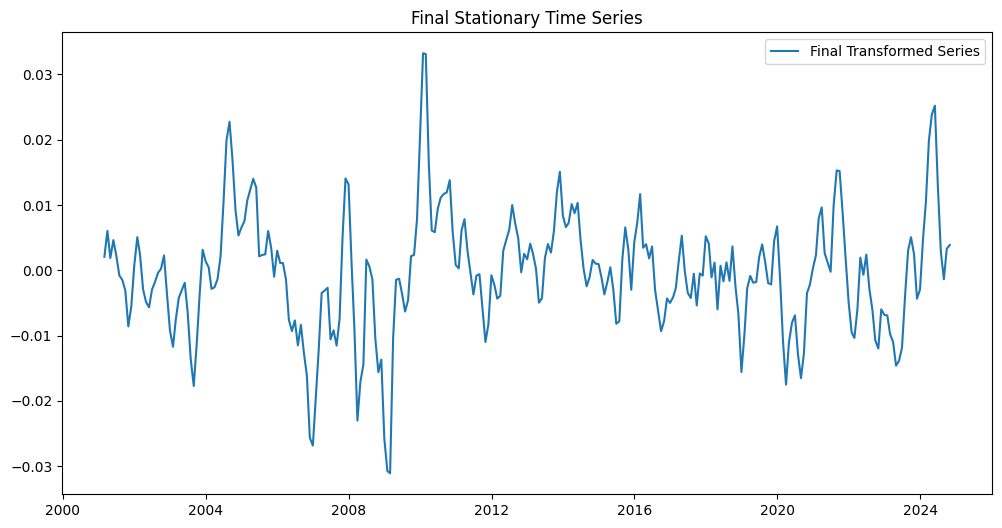


Performing Final Transformed Series
1. ADF :  -3.912587748889868
2. P-Value:  0.001944136652925795
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 268
5. Critical Values :
	 1% :  -3.454988209954765
	 5% :  -2.8723857312734613
	 10% :  -2.572549407997327

The series is stationary.

The series is now stationary after all transformations.


In [71]:
#as we still could not get a stationary series now we are again trying to do log transformation, and now we try working with SARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load your dataset (replace with your actual dataset path and column name)
df = pd.read_csv(final_data_dir, parse_dates=["date"], index_col="date")
df.rename(columns={"cost": "original_series"}, inplace=True)

# Step 1: Define function for ADF test
def adf_test(series, title='ADF Test'):
    print(f"\nPerforming {title}")
    result = adfuller(series, autolag='AIC')
    print("1. ADF : ", result[0])
    print("2. P-Value: ", result[1])
    print("3. Num Of Lags : ", result[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", result[3])
    print("5. Critical Values :")
    for key, val in result[4].items():
        print("\t", key, ": ", val)
    if result[1] <= 0.05:
        print("\nThe series is stationary.")
    else:
        print("\nThe series is not stationary.")
    return result[1]

# Step 2: Plot original series and perform ADF test
plt.figure(figsize=(12, 6))
plt.plot(df["original_series"], label="Original Series")
plt.title("Original Time Series")
plt.legend()
plt.show()

p_value_original = adf_test(df["original_series"], "Original Series")

# Step 3: Log transformation
df["log_series"] = np.log(df["original_series"])
plt.figure(figsize=(12, 6))
plt.plot(df["log_series"], label="Log-Transformed Series")
plt.title("Log-Transformed Time Series")
plt.legend()
plt.show()

p_value_log = adf_test(df["log_series"], "Log-Transformed Series")

# Step 4: Differencing (for trend removal)
df["log_diff_series"] = df["log_series"].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(df["log_diff_series"], label="Log-Differenced Series")
plt.title("Log-Differenced Time Series")
plt.legend()
plt.show()

p_value_log_diff = adf_test(df["log_diff_series"].dropna(), "Log-Differenced Series")

# Step 5: Seasonal differencing (if needed)
df["log_seasonal_diff"] = df["log_diff_series"].diff(periods=12).dropna()
plt.figure(figsize=(12, 6))
plt.plot(df["log_seasonal_diff"], label="Seasonally Differenced Series")
plt.title("Seasonally Differenced Time Series")
plt.legend()
plt.show()

p_value_seasonal_diff = adf_test(df["log_seasonal_diff"].dropna(), "Seasonally Differenced Series")

# Step 6: Plot and interpret final transformed series
final_series = df["log_seasonal_diff"].dropna()
plt.figure(figsize=(12, 6))
plt.plot(final_series, label="Final Transformed Series")
plt.title("Final Stationary Time Series")
plt.legend()
plt.show()

# Final ADF Test to ensure stationarity
p_value_final = adf_test(final_series, "Final Transformed Series")

# Check Results
if p_value_final <= 0.05:
    print("\nThe series is now stationary after all transformations.")
else:
    print("\nThe series is still not stationary. Additional transformations may be needed.")


In [72]:
print(df.columns)

Index(['original_series', 'log_series', 'log_diff_series',
       'log_seasonal_diff'],
      dtype='object')


In [73]:
print(df.head())  # Inspect the DataFrame


            original_series  log_series  log_diff_series  log_seasonal_diff
date                                                                       
2000-01-31    148936.874942   11.911278              NaN                NaN
2000-02-29    150417.156149   11.921168         0.009890                NaN
2000-03-31    151529.024100   11.928532         0.007365                NaN
2000-04-30    153384.960796   11.940706         0.012174                NaN
2000-05-31    154715.991938   11.949346         0.008640                NaN


<Figure size 1000x600 with 0 Axes>

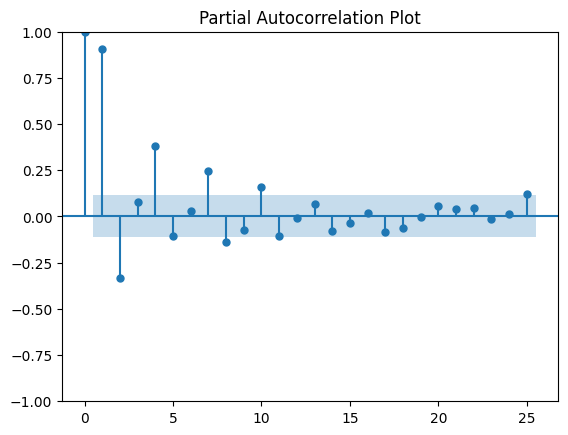

<Figure size 1000x600 with 0 Axes>

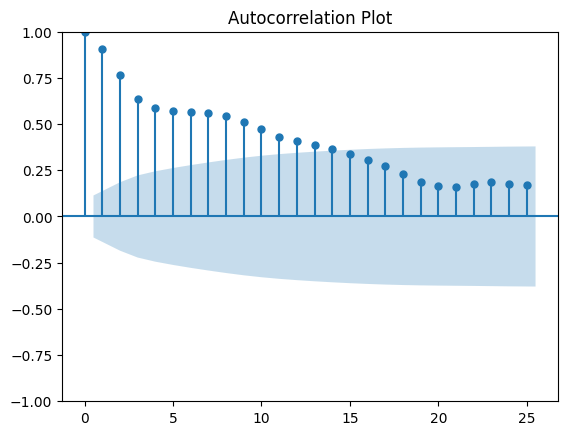

In [74]:
#SARIMA ANALYSIS 
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

# Choosing the stationary series
stationary_column = 'log_diff_series'  # Or use 'log_seasonal_diff' if it applies

# Drop NaN values before plotting
stationary_series = df[stationary_column].dropna()

# Ploting Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(stationary_series, lags=25, title="Partial Autocorrelation Plot")
plt.show()

# Ploting Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(stationary_series, lags=25, title="Autocorrelation Plot")
plt.show()


                               SARIMAX Results                                
Dep. Variable:        log_diff_series   No. Observations:                  297
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1250.697
Date:                Sun, 15 Dec 2024   AIC                          -2495.395
Time:                        18:03:48   BIC                          -2484.324
Sample:                    02-29-2000   HQIC                         -2490.962
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4659      0.155      3.001      0.003       0.162       0.770
ma.L1         -0.1951      0.170     -1.151      0.250      -0.528       0.137
sigma2      1.251e-05   9.38e-07     13.337      0.0

/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


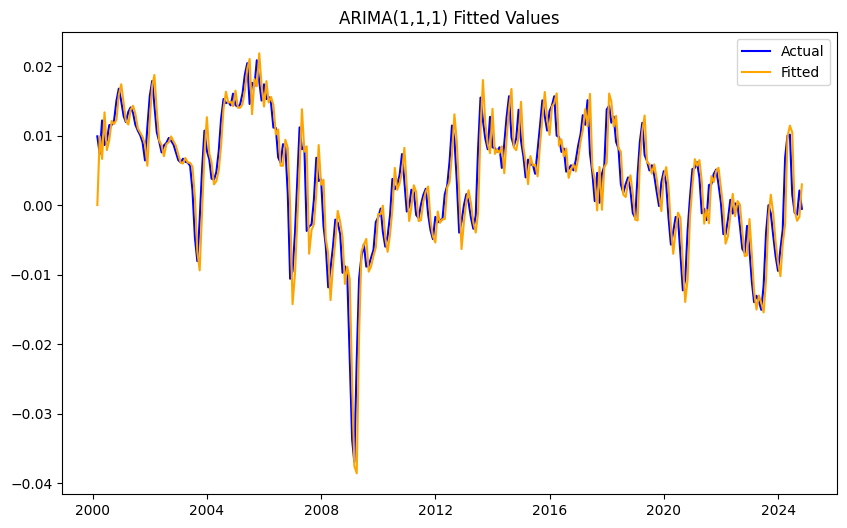

/var/folders/zd/dmj5p6xs4_53hhy5fq5j6kkm0000gn/T/ipykernel_96308/1859713129.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:],


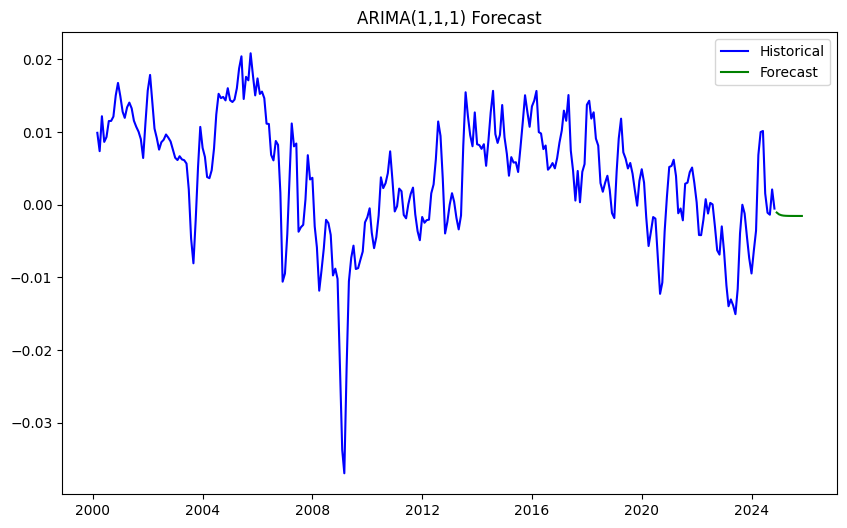

In [75]:
#SARIMAX Analysis
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Defining ARIMA order based on PACF and ACF
p, d, q = 1, 1, 1  # Start with these values

# Fiting the  ARIMA model
model = ARIMA(df['log_diff_series'].dropna(), order=(p, d, q))
model_fit = model.fit()

# Printing model summary
print(model_fit.summary())

# Forecast
forecast_steps = 12  # Forecast next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

# Calculating the performance metrics on the fitted data
fitted_values = model_fit.fittedvalues
actual_values = df['log_diff_series'].dropna()

mae = mean_absolute_error(actual_values, fitted_values)
rmse = np.sqrt(mean_squared_error(actual_values, fitted_values))

print(f"\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Ploting the original vs fitted
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title(f'ARIMA({p},{d},{q}) Fitted Values')
plt.legend()
plt.show()

# Ploting forecast
plt.figure(figsize=(10, 6))
plt.plot(df['log_diff_series'], label='Historical', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:], 
         forecast, label='Forecast', color='green')
plt.title(f'ARIMA({p},{d},{q}) Forecast')
plt.legend()
plt.show()
#we get the sarimax results and also the model performace after performing this step

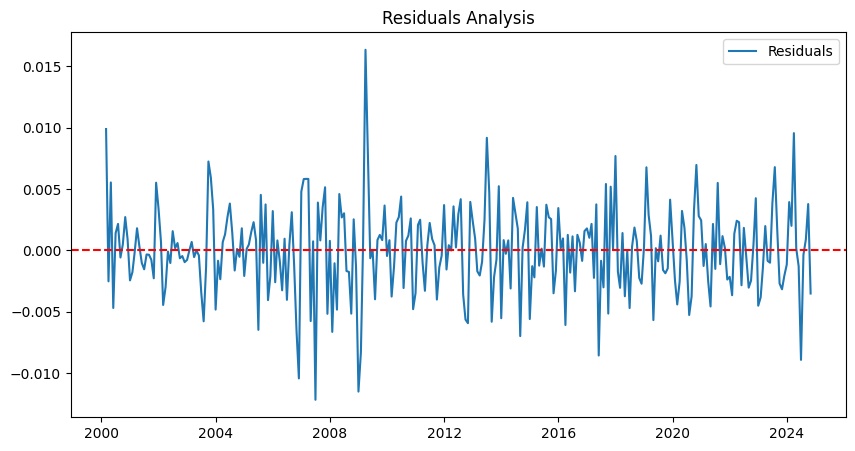

In [76]:
#residual check
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals, label="Residuals")
plt.axhline(0, linestyle='--', color='red')
plt.legend()
plt.title("Residuals Analysis")
plt.show()


In [77]:
# pip install --upgrade numpy scipy statsmodels


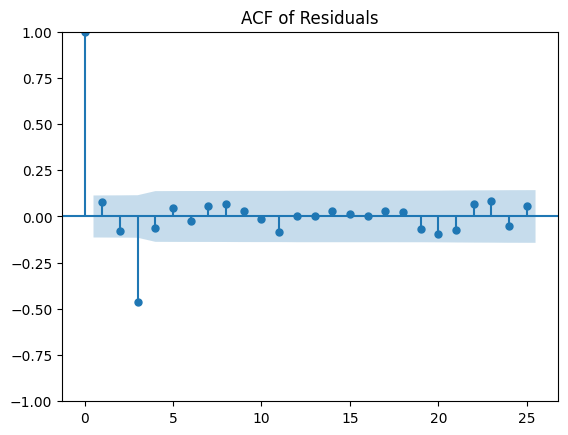

Ljung-Box Test Results:
      lb_stat     lb_pvalue
10  73.446527  9.536933e-12


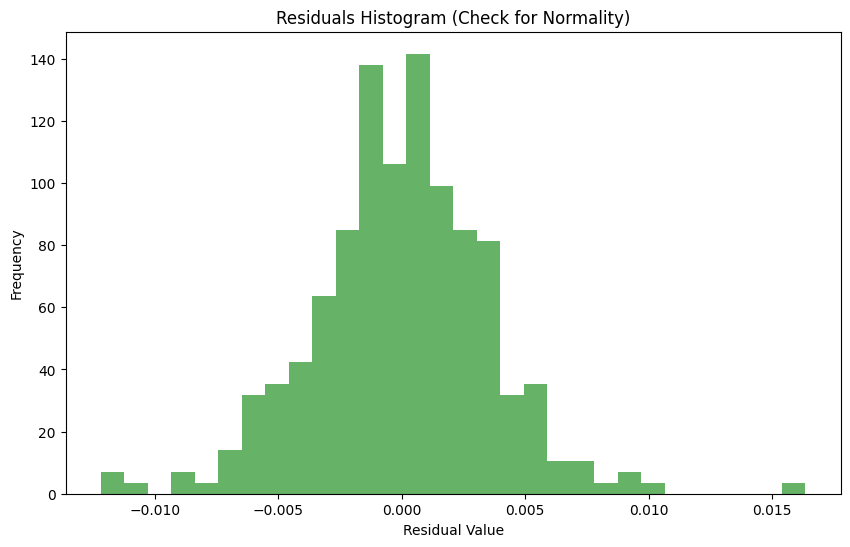

In [78]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# 1. Residual ACF Plot
residuals = model_fit.resid
plot_acf(residuals, lags=25)
plt.title("ACF of Residuals")
plt.show()

# 2. Ljung-Box Test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test)

# 3. Check Residual Normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title("Residuals Histogram (Check for Normality)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()


/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42225D+01    |proj g|=  6.18614D+00

At iterate    5    f=  9.35633D+00    |proj g|=  6.42524D-02

At iterate   10    f=  9.33361D+00    |proj g|=  7.64156D-02

At iterate   15    f=  9.31121D+00    |proj g|=  1.57106D-01

At iterate   20    f=  9.29787D+00    |proj g|=  7.59658D-03

At iterate   25    f=  9.29245D+00    |proj g|=  6.81609D-02

At iterate   30    f=  9.27777D+00    |proj g|=  5.85153D-02

At iterate   35    f=  9.27349D+00    |proj g|=  1.04141D-02

At iterate   40    f=  9.11794D+00    |proj g|=  3.94159D-02

At iterate   45    f=  9.01824D+00    |proj g|=  1.05161D-02

At iterate   50    f=  8.98721D+00    |proj g|=  3.85803D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/zd/dmj5p6xs4_53hhy5fq5j6kkm0000gn/T/ipykernel_96308/2659224125.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


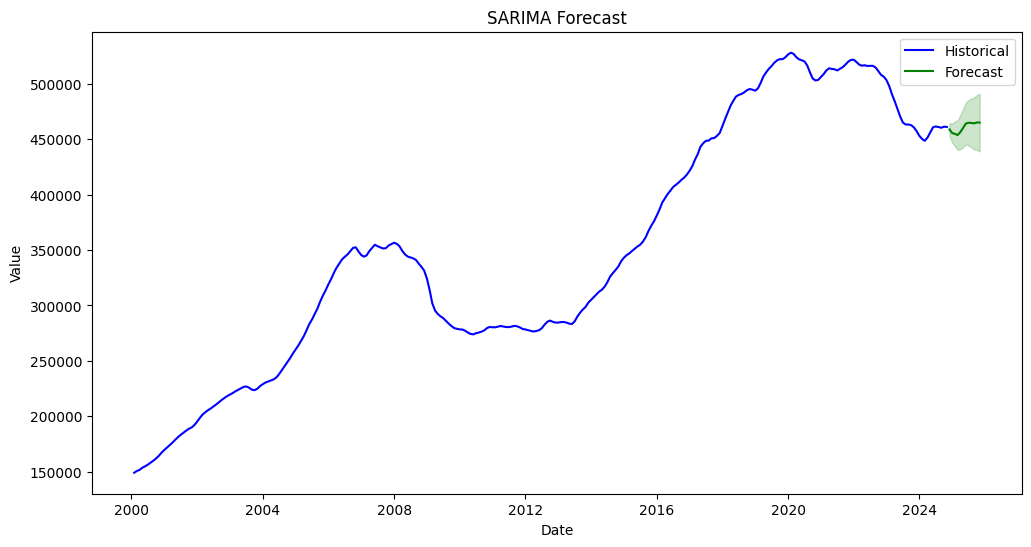

In [79]:
#for getting the forecast 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'df' is your DataFrame and it has a datetime index with a 'value' column
ts = df["original_series"]


# Fit SARIMA model
sarima_model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecast for the next 12 months
forecast = sarima_fit.get_forecast(steps=12)

# Extract forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create proper indices for the forecast
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Convert forecast results to pandas objects with proper indices
forecast_mean = pd.Series(forecast_mean.values, index=forecast_index, name='Forecast')
forecast_ci = pd.DataFrame(forecast_ci.values, index=forecast_index, columns=['lower', 'upper'])

# Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label="Historical", color="blue")
plt.plot(forecast_mean, label="Forecast", color="green")
plt.fill_between(forecast_ci.index, forecast_ci['lower'], forecast_ci['upper'], color="green", alpha=0.2)
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


In [80]:
# Assuming that we have loaded the data and processed it as shown before

# Using the stationary time series for modeling
ts = df["log_seasonal_diff"].dropna()

# Verifying the shape and head of ts
print("Shape of ts:", ts.shape)
print("Head of ts:\n", ts.head())


Shape of ts: (285,)
Head of ts:
 date
2001-02-28    0.002060
2001-03-31    0.006032
2001-04-30    0.001877
2001-05-31    0.004622
2001-06-30    0.002239
Name: log_seasonal_diff, dtype: float64


/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/devmewada/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/zd/dmj5p6xs4_53hhy5fq5j6kkm0000gn/T/ipykernel_96308/4279349202.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")


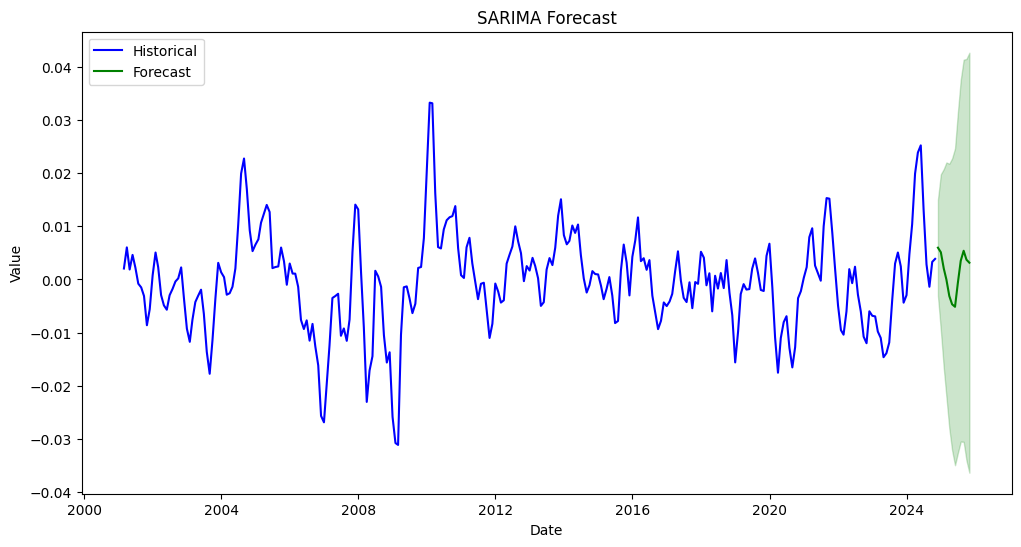

In [81]:
# Ensuring ts is properly indexed and prepared
ts = df["log_seasonal_diff"].dropna()

# Fit SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecasting the next 12 months
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Correcting the index for forecasted values
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ts, label="Historical", color="blue")
plt.plot(forecast_mean, label="Forecast", color="green")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="green", alpha=0.2)
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


In [82]:
#splitting the data into training and testing 
train=X[:len(X)-7]
test=X[len (X) -7:]

In [83]:
model=AutoReg(train,lags=10).fit()

In [84]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  291
Model:                    AutoReg(10)   Log Likelihood               -2354.587
Method:               Conditional MLE   S.D. of innovations           1054.029
Date:                Sun, 15 Dec 2024   AIC                           4733.174
Time:                        18:03:53   BIC                           4776.834
Sample:                            10   HQIC                          4750.684
                                  291                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        382.1175    223.833      1.707      0.088     -56.588     820.823
y.L1           2.2841      0.061     37.676      0.000       2.165       2.403
y.L2          -1.5812      0.151    -10.471      0.0

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  291
Model:             Restr. AutoReg(10)   Log Likelihood               -2413.089
Method:               Conditional MLE   S.D. of innovations           1297.983
Date:                Sun, 15 Dec 2024   AIC                           4836.178
Time:                        18:03:53   BIC                           4854.370
Sample:                            10   HQIC                          4843.474
                                  291                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        475.5284    275.061      1.729      0.084     -63.582    1014.639
y.L1           1.8810      0.038     49.377      0.000       1.806       1.956
y.L2          -0.8801      0.042    -20.870      0.0

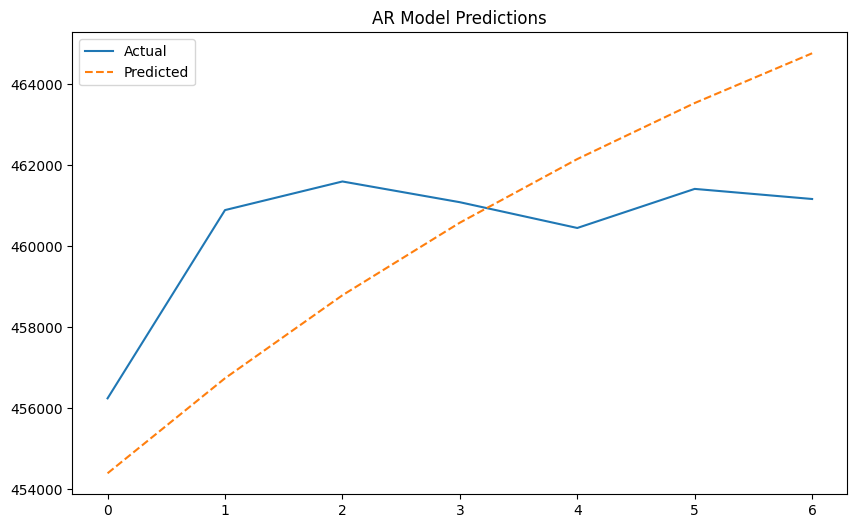

In [85]:
#checking the error rate and evaluating the model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# spliting the data into Train/Test
train = X[:len(X)-7]
test = X[len(X)-7:]

# Fit AutoRegressive model with significant lags (1, 2, 10)
model = AutoReg(train, lags=[1, 2, 10]).fit()
print(model.summary())

# Predicting on test set
predictions = model.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluating model
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"MAE: {mae}, RMSE: {rmse}")

# Plot predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test, label="Actual")
plt.plot(predictions, label="Predicted", linestyle="--")
plt.title("AR Model Predictions")
plt.legend()
plt.show()


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  291
Model:             Restr. AutoReg(12)   Log Likelihood               -2396.701
Method:               Conditional MLE   S.D. of innovations           1301.651
Date:                Sun, 15 Dec 2024   AIC                           4807.403
Time:                        18:03:53   BIC                           4832.821
Sample:                            12   HQIC                          4817.599
                                  291                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        476.4528    279.772      1.703      0.089     -71.889    1024.795
y.L1           1.8825      0.038     49.143      0.000       1.807       1.958
y.L2          -0.8832      0.043    -20.668      0.0

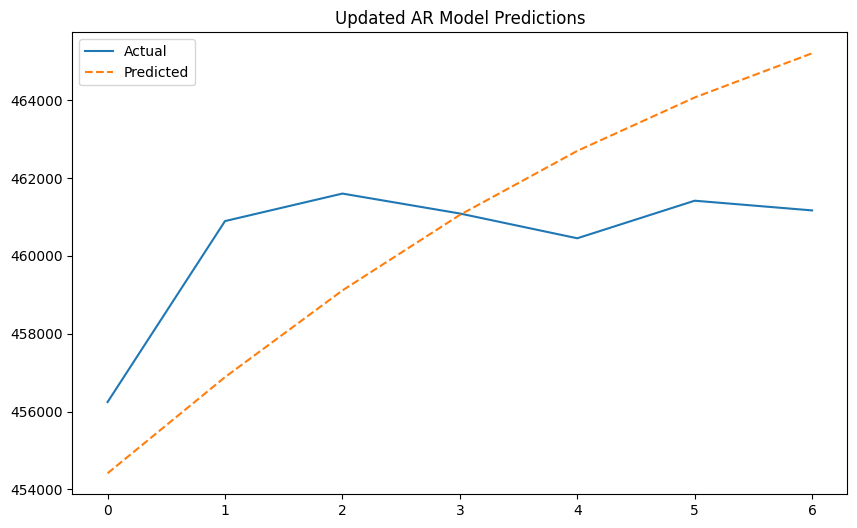

In [86]:
# Fit AutoRegressive model with additional lags
model = AutoReg(train, lags=[1, 2, 10, 11, 12]).fit()
print(model.summary())

# Predict and evaluate again
predictions = model.predict(start=len(train), end=len(train) + len(test) - 1)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Updated MAE: {mae}, Updated RMSE: {rmse}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test, label="Actual")
plt.plot(predictions, label="Predicted", linestyle="--")
plt.title("Updated AR Model Predictions")
plt.legend()
plt.show()


In [89]:
from statsmodels.tsa.stattools import adfuller
model = AutoReg(train, lags=range(1, 20)).fit()
print(model.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  291
Model:                    AutoReg(19)   Log Likelihood               -2271.397
Method:               Conditional MLE   S.D. of innovations           1024.321
Date:                Sun, 15 Dec 2024   AIC                           4584.794
Time:                        18:06:01   BIC                           4660.515
Sample:                            19   HQIC                          4615.193
                                  291                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        377.1369    231.549      1.629      0.103     -76.691     830.965
y.L1           2.3220      0.062     37.481      0.000       2.201       2.443
y.L2          -1.6188      0.157    -10.340      0.0

In [90]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# Find the optimal lag using AIC
best_aic = np.inf
best_lag = None
best_model = None

for lag in range(1, 21):  # Try lags from 1 to 20
    model = AutoReg(train, lags=lag).fit()
    if model.aic < best_aic:
        best_aic = model.aic
        best_lag = lag
        best_model = model

print(f"Best lag: {best_lag}, AIC: {best_aic}")
print(best_model.summary())


Best lag: 20, AIC: 4570.507291376799
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  291
Model:                    AutoReg(20)   Log Likelihood               -2263.254
Method:               Conditional MLE   S.D. of innovations           1025.106
Date:                Sun, 15 Dec 2024   AIC                           4570.507
Time:                        18:06:07   BIC                           4649.754
Sample:                            20   HQIC                          4602.326
                                  291                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        390.8939    233.260      1.676      0.094     -66.287     848.075
y.L1           2.3230      0.062     37.460      0.000       2.201       2.445
y.L2          -

In [91]:
model = AutoReg(train, lags=best_lag).fit()


In [92]:
predictions = model.predict(start=len(train), end=len(train) + len(test) - 1)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"MAE: {mae}, RMSE: {rmse}")


MAE: 1020.7519147030544, RMSE: 1207.562461530934


In [93]:
print(len(train))

291


In [94]:
#Make Predictions on Test Set and Compare
pred=model.predict(start=len(train),end=len(X) -1,dynamic=False)

[455113.20514987 458812.53260659 459922.6703538  460115.27313826
 460307.44188402 460556.66879285 461446.55502565]


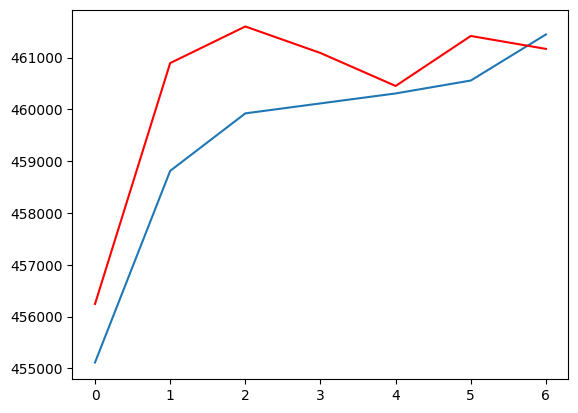

In [95]:
from matplotlib import pyplot
pyplot.plot (pred)
pyplot. plot(test, color='red')
print(pred)

In [96]:
#calculate error
from math import sqrt 
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error (test, pred))

In [97]:
print(rmse)

1207.562461530934


In [98]:
#making future predictions
pred_future=model.predict(start=len(X)+1, end=len(X)+7,dynamic=False)
print("The future prediction for the next week")
print(pred_future)
print( 'Number of Predictions Made: \t', len(pred_future))

The future prediction for the next week
[464262.80994296 465721.6614068  466465.18817764 466811.99079668
 467081.90826932 467707.91119068 468749.37449882]
Number of Predictions Made: 	 7
